In [1]:
%load_ext autoreload
%autoreload 2

In [98]:
import pandas as pd
import numpy as np
import json
import os
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [110]:
nltk.download('punkt')

# Raw Anime Data

In [112]:
users

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99
...,...,...,...,...,...
77656,daniel1302,NaN,NaN,[],https://myanimelist.net/profile/daniel1302
77657,bridgesams,Male,"Jan 1, 2001","['37510', '35180', '30', '31043', '5081', '374...",https://myanimelist.net/profile/bridgesams
77659,Officer_Anime,NaN,NaN,[],https://myanimelist.net/profile/Officer_Anime
77660,Yuez,NaN,NaN,[],https://myanimelist.net/profile/Yuez


## Loading and Dropping Duplicates

In [51]:
# Paths
RAW_FOLDER = './data/raw/'
ANIME_FILE = 'animes.csv'
PROFILES_FILE = 'profiles.csv'
REVIEWS_FILE = 'reviews.csv'

In [52]:
anime = pd.read_csv(os.path.join(RAW_FOLDER, ANIME_FILE))
users = pd.read_csv(os.path.join(RAW_FOLDER, PROFILES_FILE))
reviews = pd.read_csv(os.path.join(RAW_FOLDER, REVIEWS_FILE))

In [53]:
anime = anime.drop_duplicates()
users = users.drop_duplicates()
reviews = reviews.drop_duplicates()

In [111]:
# Raw Dataset Statistics
print(f"# Anime: {len(anime)}")
print(f"# Users: {len(users)}")
print(f"# Reviews: {len(reviews)}")
assert len(users['profile'].unique()) == len(reviews['profile'].unique())

# Anime: 16368
# Users: 47902
# Reviews: 130519


## Distribution of Reviews by Anime

In [81]:
anime_counts = Counter(reviews['anime_uid']).values()

Mean Reviews per Anime: 16.08763712560089
Median Reviews per Anime: 3


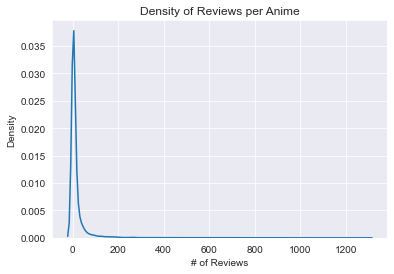

In [113]:
p = sns.kdeplot(anime_counts)
p.set(xlabel="# of Reviews", ylabel="Density", title="Density of Reviews per Anime")
print(f"Mean Reviews per Anime: {sum(anime_counts) / len(anime_counts)}")
print(f"Median Reviews per Anime: {sorted(anime_counts)[len(anime_counts)//2]}")

## Distribution of Reviews by User

In [95]:
user_counts = Counter(reviews['profile']).values()

Mean Reviews per User: 2.7256760989871567
Median Reviews per User: 1


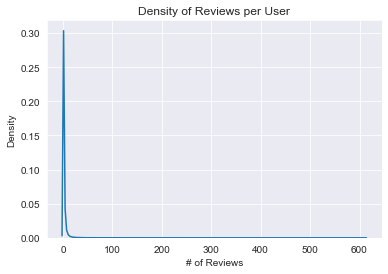

In [114]:
p = sns.kdeplot(user_counts)
p.set(xlabel="# of Reviews", ylabel="Density", title="Density of Reviews per User")
print(f"Mean Reviews per User: {sum(user_counts) / len(user_counts)}")
print(f"Median Reviews per User: {sorted(user_counts)[len(user_counts)//2]}")

# New Anime Dataset (Make sure to run processing notebook first)

In [115]:
# TODO: insert here

# Miscellaneous

## Movie Lens Formatting (Should copy the column names if using shelf implementations)

In [ ]:
# Paths
MOVIELENS_FOLDER = "./data/ml-1m/"
MOVIELENS_RATINGS_FILE = "ratings.dat"

In [ ]:
# UserID::MovieID::Rating::Timestamp
df_ml = pd.read_table(
    os.path.join(MOVIELENS_FOLDER, MOVIELENS_RATINGS_FILE),
    sep="::",
    names=["user_id", "item_id", "rating", "timestamp"],
    engine="python",
)

In [ ]:
df_ml.head()

,user_id,item_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
